# Now Insurance Loss Runs #
## automatic extraction of relevant information in loss reports from pdf files ##

In [1]:
## load depedencies 
import lossrun
import matplotlib.pyplot as plt

## Pre-processing ##

In [2]:
## Select file


# pdf raw file no ext 
#__________________________________________
pdf_file = 'AHC-0000343 loss runs PIO-YES0'
#___________________________________________

# topic files
topic_file = 'config_file_proto.ino'
# Pre proc data
txt_dict, image_c, image, _ = lossrun.pre_proc(pdf_file, 'data', topic_file)


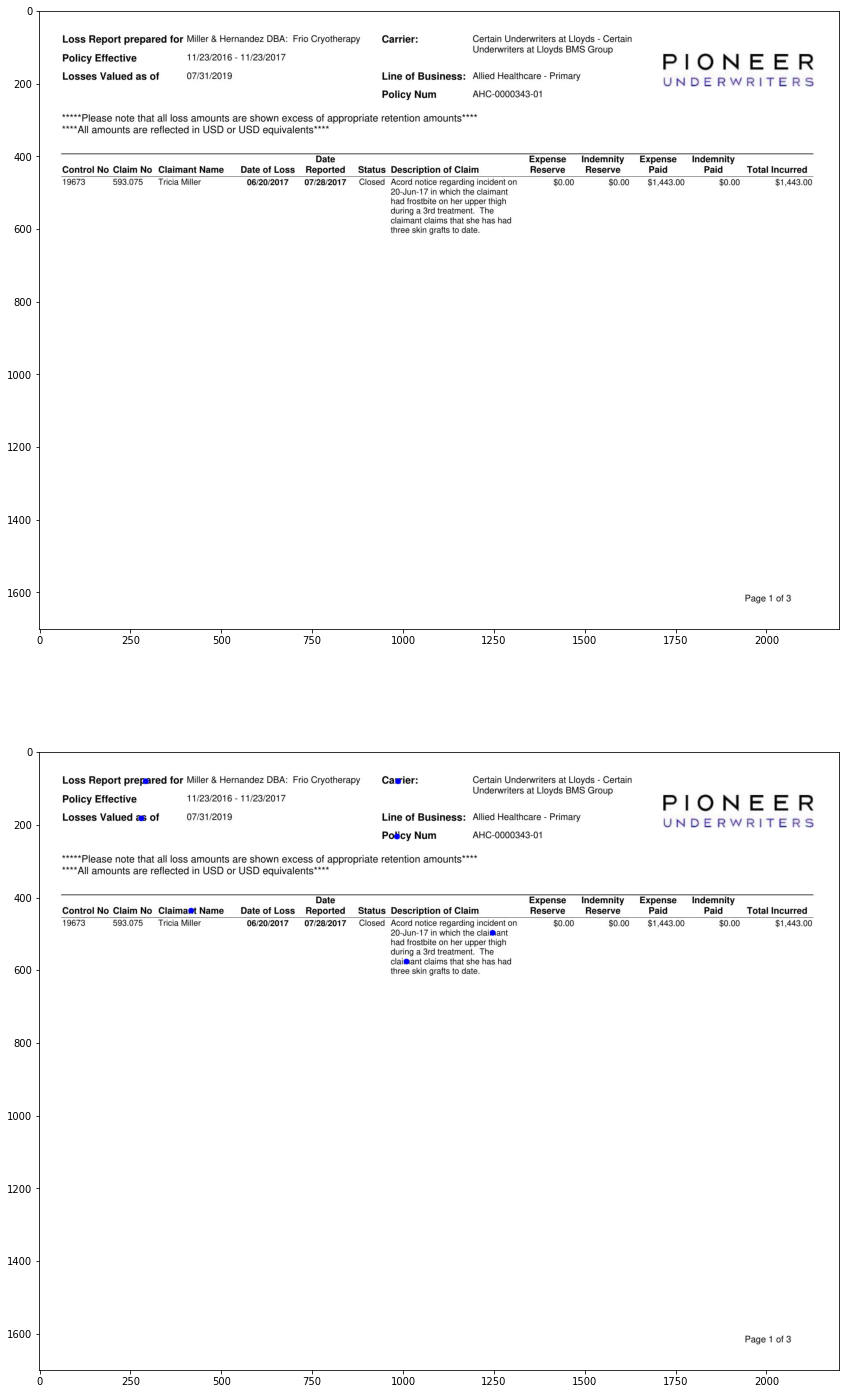

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fa38e349f10>, None)

In [3]:
# vizualizate data
plt.figure(figsize=(15,25))
# Orignial data
plt.subplot(2,1,1), plt.imshow(image)
# Orignial data
plt.subplot(2,1,2), plt.imshow(image_c), plt.show()

## Spatial relation filter ##

In [4]:
## load topics

# search topics in data pre - proc
_, _, _, topics = lossrun.pre_proc(pdf_file, 'data', topic_file)
spatial_filter = lossrun.spatial_filter(txt_dict, topics)

# select topic
topic = 5

# data ver
print('SEARCHING TOPIC: ' + topics[topic][0] + '\n')
print('IN SPATIAL DATA FILTERED: ' + ' '.join(spatial_filter[topic]) )


SEARCHING TOPIC: valued date

IN SPATIAL DATA FILTERED: that are No  7/31/2014 i i : Allied Health - Pri of 07/31/2019 Line of Business ied Healthcare - Primary UNDERWRITERS


## Name entity recognition ##

In [35]:
import spacy 
nlp = spacy.load('en')


from configobj import ConfigObj
ner_rules = ConfigObj('config_rules_proto.ino')

for i in range(len(spatial_filter)):
    string = ' '.join(spatial_filter[:][i])
    
    doc = nlp(string)
    for j in range(len(ner_rules[topics[i][0]])):

        for ent in doc.ents:
            if ent.label_ == (ner_rules[topics[i][0]][j]):
                print(topics[i][0],ner_rules[topics[i][0]], ent.ents)
    


insurer ['ORG'] [Lloyds BMS Group]
insured ['PERSON', 'ORG'] [Miller & Hernandez]
insured ['PERSON', 'ORG'] [Tricia Miller]
valued date ['DATE'] [7/31/2014]
policy ['CARDINAL'] [20-Jun-17]
policy ['CARDINAL'] [three]


## Contextual analysis

In [7]:
# Call the model 
#model = lossrun.load_context_model()

In [8]:
# check topic
#model.most_similar('date')